In [11]:
import numpy as np

"""
define your neural network. These parameters have to be initially declared.
N: input batch size, 
D_in: Input dimensions(here we have a total of 1000 input data)
D_out: Output labels  
H : number of hidden units. we have 10 here
"""
N, D_in, H, D_out = 64, 1000, 100, 10

#Create random input and output data

x = np.random.randn(N, D_in)
y = np.random.randn(N, D_out)

#initialize random weights
w1 = np.random.randn(D_in, H)
w2 = np.random.randn(H, D_out)

#Define Learning rate to update weights
learning_rate = 1e-6

#We compute the gradients on complete bath rather than individual inputs
#run the loop for predefined epochs

for run in range(500):
    
    #Step:1 Forward pass
    h = x.dot(w1)
    #pass thru non linear activation function. Using RELU
    h_relu = np.maximum(h, 0)
    
    # compute the dot products to output layer. No activation here
    y_pred = h_relu.dot(w2)
    
    #Step2: Compute loss
    loss = np.square(y - y_pred).sum()
    print(run, loss)
    
    #step3: Gradient Descent: Back prop to compute gradients of w1 and w2
    grad_y_pred = 2 * (y_pred - y)
    grad_w2 = h_relu.T.dot(grad_y_pred)
    grad_h_relu = grad_y_pred.dot(w2.T)
    grad_h = grad_h_relu.copy()
    grad_h[h < 0] = 0
    grad_w1 = x.T.dot(grad_h)
    
    #update weights
    w1 -= learning_rate * grad_w1
    w2 -= learning_rate * grad_w2
    
    
    

0 25165598.0102


# 2 layer neural using Tensors

In [8]:
import torch

dtype = torch.FloatTensor

"""
N is the batch size
D_in is the input dimension
D_out is the Output dimension. Number of expected labels
h is number of hidden units.
"""
N, D_in, D_out, H = 64, 1000, 10, 100

#create input and out put matrix

x = torch.randn(N, D_in).type(dtype)
y = torch.randn(N, D_out).type(dtype)

#initialise the weight vector

w1 = torch.randn(D_in, H).type(dtype)
w2 = torch.randn(H, D_out).type(dtype)

learning_rate = 1e-6

for t in range(1):
    h = x.mm(w1)
    h_relu = h.clamp(min = 0)
    y_pred = h_relu.mm(w2)
    
    loss = (y_pred - y).pow(2).sum()
    
    print(t, loss)
    
    #back prop
    
    grad_y_pred = 2 * (y_pred - y)
    grad_w2 = h_relu.t().mm(grad_ypred)
    grad_h_relu = grad_y_pred.mm(w2.t())
    grad_h = grad_h_relu.clone()
    grad_h[h < 0] = 0
    grad_w1 = x.t().mm(grad_h)

    # Update weights using gradient descent
    w1 -= learning_rate * grad_w1
    w2 -= learning_rate * grad_w2


0 37735796.56236088


# Neural Network with pytorch variables - using autograd

In [20]:
from torch.autograd import Variable
import matplotlib.pyplot as plt

loss_arr = []

dtype = torch.FloatTensor

N, D_in, D_out, H = 64, 1000, 10, 100

x = Variable(torch.randn(N, D_in).type(dtype), requires_grad = False)
y = Variable(torch.randn(N, D_out).type(dtype), requires_grad = False)

w1 = Variable(torch.randn(D_in, H).type(dtype), requires_grad = True)
w2 = Variable(torch.randn(H, D_out).type(dtype), requires_grad = True)

learning_rate = 1e-6
for i in range(500):
    h = x.mm(w1)
    h_relu = h.clamp(min = 0)
    y_pred = h_relu.mm(w2)
    
    loss = (y_pred - y).pow(2).sum()
    
    #print(i, loss.data[0])
    loss_arr.append(loss.data[0])
    loss.backward()
    
    
    w1.data = w1.data - learning_rate * w1.grad.data
    w2.data = w2.data - learning_rate * w2.grad.data
    
    w1.grad.data.zero_()
    w2.grad.data.zero_()

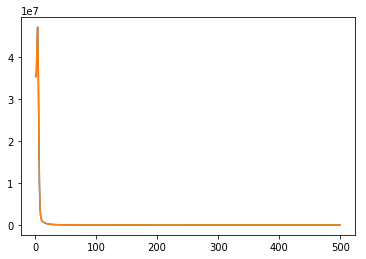

In [22]:
import numpy as np

x = np.linspace(1, 500, 500)

y = loss_arr

plt.plot(x, y)
plt.show()

# Neural Network Implementation using Pytorch nn package

In [30]:
import torch
from torch.autograd import Variable
import numpy as np

dtype = torch.FloatTensor

N, D_in, D_out, H = 64, 1000, 10, 100

x = Variable(torch.randn(N, D_in).type(dtype), requires_grad = False)
y = Variable(torch.randn(N, D_out), requires_grad = False)

model = torch.nn.Sequential(torch.nn.Linear(D_in, H, bias = True),
                            torch.nn.ReLU(),
                            torch.nn.Linear(H, D_out, bias=True)
        )

loss_fn = torch.nn.MSELoss(size_average=False)

learning_rate = 1e-4

for t in range(500):
    y_pred = model(x)
    
    loss = loss_fn(y_pred, y)
    print(t, loss.data[0])
    
    model.zero_grad()
    
    loss.backward()
    
    for param in model.parameters():
        param.data -= learning_rate * param.grad.data

0 661.3726196289062
1 613.7214965820312
2 573.1510009765625
3 537.80810546875
4 506.3824157714844
5 478.0826110839844
6 452.2562255859375
7 428.3591613769531
8 406.200927734375
9 385.59954833984375
10 366.1639404296875
11 347.920654296875
12 330.63787841796875
13 314.3023376464844
14 298.7052001953125
15 283.8702392578125
16 269.75140380859375
17 256.2711486816406
18 243.439208984375
19 231.19265747070312
20 219.46563720703125
21 208.2959747314453
22 197.6421661376953
23 187.46929931640625
24 177.800537109375
25 168.5679168701172
26 159.73736572265625
27 151.30897521972656
28 143.28689575195312
29 135.64720153808594
30 128.36734008789062
31 121.45113372802734
32 114.88208770751953
33 108.62274169921875
34 102.66434478759766
35 97.02012634277344
36 91.67391204833984
37 86.61100006103516
38 81.81837463378906
39 77.28254699707031
40 72.98246765136719
41 68.90815734863281
42 65.04307556152344
43 61.37541961669922
44 57.908504486083984
45 54.636802673339844
46 51.54840087890625
47 48.635700

370 0.0002134506357833743
371 0.000206975411856547
372 0.0002006955473916605
373 0.00019461232295725495
374 0.00018871559586841613
375 0.00018299039220437407
376 0.0001774476986611262
377 0.00017207411292474717
378 0.0001668605109443888
379 0.0001618115056771785
380 0.00015691046428401023
381 0.00015216450265143067
382 0.00014756487507838756
383 0.0001431014243280515
384 0.00013878107711207122
385 0.0001345861965091899
386 0.0001305162877542898
387 0.00012658091145567596
388 0.0001227533648489043
389 0.00011904602433787659
390 0.0001154577694251202
391 0.00011197268759133294
392 0.00010859630856430158
393 0.00010532479063840583
394 0.00010215028305537999
395 9.907277853926644e-05
396 9.608944674255326e-05
397 9.319108357885852e-05
398 9.038492135005072e-05
399 8.766532846493647e-05
400 8.5028528701514e-05
401 8.246945799328387e-05
402 7.998733781278133e-05
403 7.758157880743966e-05
404 7.5251649832353e-05
405 7.299045682884753e-05
406 7.079596252879128e-05
407 6.8666398874484e-05
408 6